Name: Lochan Basyal

1. Use the posted Python Code file to test MNIST image data:

"EE628A_autoEncoder_demo.py"

Test if you can obtain the decoded images and show them properly.

2. Use different epoch size from 5, 10, 20, 30, 40, 50, 100 and test the same code.

3. Use different number of layers of the deep networks (2, 3, 4, 5) and compare the performances.  

4. Use auto encoder to find anomaly images:

4.aYou randomly download a few images other than the MNIST image dataset. For example, animals, furnitures, automobiles, etc.

4.b Reform these images to a grayscale images without color channels (similar to the minist dataset).  

4.c Use the above auto encoder to predict these download and reformed grayscale images. Show how much differences between the input images and the reconstructed after auto-encoder images.

EE628A_autoEncoder_demo.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 6s 23ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - 

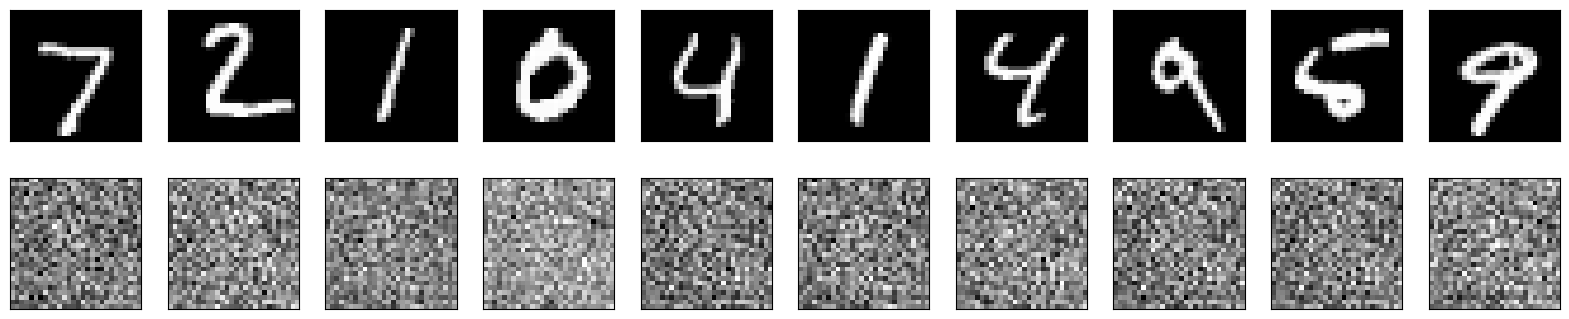

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential

In [ ]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Compression factor: 24.5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2775 - val_loss: 0.1884
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1704 - val_loss: 0.1537
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1446 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1283 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1173 - val_loss: 0.1119
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1099 - val_loss: 0.1057
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1048 - val_loss: 0.1015
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0988 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0972 - val_loss: 

Decoded Images Visualization

313/313 [==============================] - 0s 1ms/step


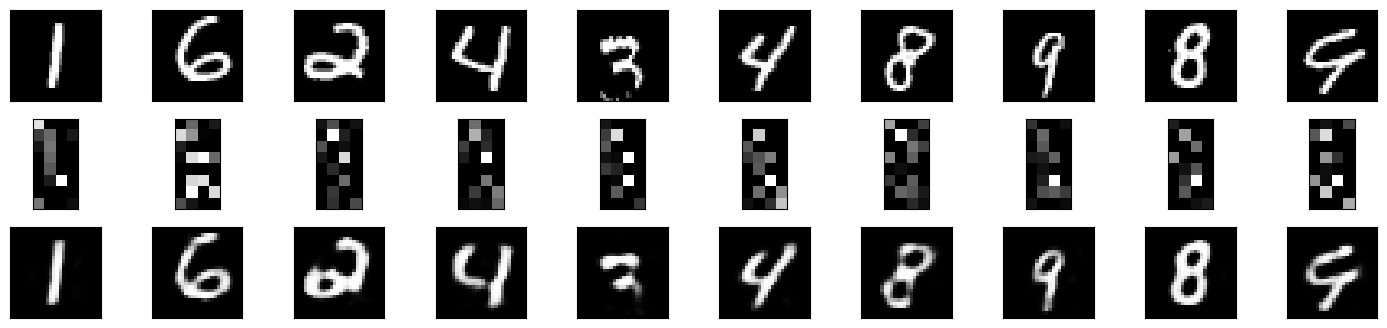

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
del autoencoder

In [ ]:
def autoencoder_fn():
  autoencoder = Sequential()

  # Encoder Layers
  autoencoder.add(Dense(10 * encoding_dim, input_shape=(input_dim,), activation = 'relu'))
  autoencoder.add(Dense(6 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(encoding_dim, activation='relu'))
  # Decoder Layers
  autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(6 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(10 * encoding_dim, activation='relu'))
  autoencoder.add(Dense(input_dim, activation='sigmoid'))

  return autoencoder


In [ ]:
autoencoder = autoencoder_fn()
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 320)               251200    
                                                                 
 dense_5 (Dense)             (None, 192)               61632     
                                                                 
 dense_6 (Dense)             (None, 128)               24704     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)              

Different Epoch Training

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=5,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 9s 34ms/step - loss: 0.2467 - val_loss: 0.1719
Epoch 2/5
235/235 [==============================] - 6s 27ms/step - loss: 0.1556 - val_loss: 0.1445
Epoch 3/5
235/235 [==============================] - 8s 33ms/step - loss: 0.1373 - val_loss: 0.1302
Epoch 4/5
235/235 [==============================] - 6s 27ms/step - loss: 0.1278 - val_loss: 0.1232
Epoch 5/5
235/235 [==============================] - 8s 33ms/step - loss: 0.1215 - val_loss: 0.1181


In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 9s 33ms/step - loss: 0.2584 - val_loss: 0.1915
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1604 - val_loss: 0.1439
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1378 - val_loss: 0.1303
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1272 - val_loss: 0.1235
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1197 - val_loss: 0.1156
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1138 - val_loss: 0.1102
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1098 - val_loss: 0.1076
Epoch 8/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1067 - val_loss: 0.1055
Epoch 9/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1040 - val_loss: 0.1024
Epoch 10/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1017 - val_lo

In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 8s 29ms/step - loss: 0.2440 - val_loss: 0.1752
Epoch 2/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1534 - val_loss: 0.1395
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1356 - val_loss: 0.1290
Epoch 4/20
235/235 [==============================] - 8s 33ms/step - loss: 0.1257 - val_loss: 0.1205
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 0.1185 - val_loss: 0.1153
Epoch 6/20
235/235 [==============================] - 8s 32ms/step - loss: 0.1138 - val_loss: 0.1114
Epoch 7/20
235/235 [==============================] - 7s 30ms/step - loss: 0.1109 - val_loss: 0.1089
Epoch 8/20
235/235 [==============================] - 7s 29ms/step - loss: 0.1082 - val_loss: 0.1062
Epoch 9/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1060 - val_loss: 0.1042
Epoch 10/20
235/235 [==============================] - 7s 29ms/step - loss: 0.1042 - val_lo

In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 9s 29ms/step - loss: 0.2450 - val_loss: 0.1743
Epoch 2/30
235/235 [==============================] - 8s 33ms/step - loss: 0.1515 - val_loss: 0.1392
Epoch 3/30
235/235 [==============================] - 7s 28ms/step - loss: 0.1346 - val_loss: 0.1299
Epoch 4/30
235/235 [==============================] - 8s 33ms/step - loss: 0.1261 - val_loss: 0.1207
Epoch 5/30
235/235 [==============================] - 7s 28ms/step - loss: 0.1195 - val_loss: 0.1165
Epoch 6/30
235/235 [==============================] - 8s 33ms/step - loss: 0.1151 - val_loss: 0.1131
Epoch 7/30
235/235 [==============================] - 6s 27ms/step - loss: 0.1117 - val_loss: 0.1093
Epoch 8/30
235/235 [==============================] - 8s 33ms/step - loss: 0.1088 - val_loss: 0.1073
Epoch 9/30
235/235 [==============================] - 7s 29ms/step - loss: 0.1064 - val_loss: 0.1048
Epoch 10/30
235/235 [==============================] - 7s 31ms/step - loss: 0.1041 - val_lo

In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
235/235 [==============================] - 8s 28ms/step - loss: 0.2523 - val_loss: 0.1752
Epoch 2/40
235/235 [==============================] - 8s 32ms/step - loss: 0.1574 - val_loss: 0.1438
Epoch 3/40
235/235 [==============================] - 7s 28ms/step - loss: 0.1381 - val_loss: 0.1319
Epoch 4/40
235/235 [==============================] - 7s 31ms/step - loss: 0.1283 - val_loss: 0.1224
Epoch 5/40
235/235 [==============================] - 7s 29ms/step - loss: 0.1214 - val_loss: 0.1178
Epoch 6/40
124/235 [==============>...............] - ETA: 3s - loss: 0.1179

In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 8s 27ms/step - loss: 0.2411 - val_loss: 0.1705
Epoch 2/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1545 - val_loss: 0.1419
Epoch 3/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1365 - val_loss: 0.1294
Epoch 4/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1265 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1186 - val_loss: 0.1141
Epoch 6/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1135 - val_loss: 0.1108
Epoch 7/50
235/235 [==============================] - 7s 28ms/step - loss: 0.1100 - val_loss: 0.1077
Epoch 8/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1069 - val_loss: 0.1054
Epoch 9/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1047 - val_loss: 0.1033
Epoch 10/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1025 - val_lo

In [ ]:
del autoencoder
autoencoder = autoencoder_fn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 8s 27ms/step - loss: 0.2536 - val_loss: 0.1898
Epoch 2/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1694 - val_loss: 0.1535
Epoch 3/100
235/235 [==============================] - 7s 28ms/step - loss: 0.1457 - val_loss: 0.1386
Epoch 4/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1347 - val_loss: 0.1301
Epoch 5/100
235/235 [==============================] - 7s 30ms/step - loss: 0.1277 - val_loss: 0.1253
Epoch 6/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1220 - val_loss: 0.1193
Epoch 7/100
235/235 [==============================] - 7s 32ms/step - loss: 0.1176 - val_loss: 0.1147
Epoch 8/100
235/235 [==============================] - 7s 28ms/step - loss: 0.1140 - val_loss: 0.1126
Epoch 9/100
235/235 [==============================] - 7s 31ms/step - loss: 0.1111 - val_loss: 0.1091
Epoch 10/100
235/235 [==============================] - 7s 28ms/step - loss: 0.109

Different Architecture and number of trainable parameters

In [ ]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder_layer4 = autoencoder.layers[3]
encoder_layer5 = autoencoder.layers[4]
encoder = Model(input_img, encoder_layer5(encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img))))))
encoder.summary()

In [ ]:
#def decoder(encoded_input):
#  h=Dense(inter_encoding_dim, activation='relu')(encoded_input)
#  decoded= Dense(input_dim, activation='sigmoid')(h)
#  return decoded

In [ ]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1=autoencoder.layers[-5]
decoder_layer2=autoencoder.layers[-4]
decoder_layer3=autoencoder.layers[-3]
decoder_layer4=autoencoder.layers[-2]
decoder_layer5=autoencoder.layers[-1]
decoder=Model(encoded_input, decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_69 (Dense)            (None, 64)                2112      
                                                                 
 dense_70 (Dense)            (None, 128)               8320      
                                                                 
 dense_71 (Dense)            (None, 192)               24768     
                                                                 
 dense_72 (Dense)            (None, 320)               61760     
                                                                 
 dense_73 (Dense)            (None, 784)               251664    
                                                                 
Total params: 348,624
Trainable params: 348,624
Non-trainab

Testing my Own Image

1/1 [==============================] - 0s 66ms/step


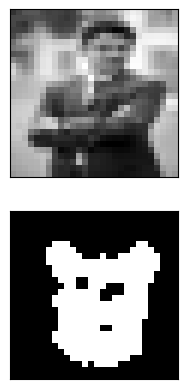

In [ ]:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
x = Image.open('/content/drive/MyDrive/Lochan_basyal', 'r')
x = x.convert('L')

# Resize the image to 28x28
x = x.resize((28, 28))

# Convert the image to a numpy array of shape (28, 28) and type float64
y = np.asarray(x.getdata(), dtype=np.float64).reshape((x.size[1], x.size[0]))

# Reshape the numpy array to shape (1, 784) to match the input shape of the autoencoder
yy = y.reshape(1, 784)

# Pass the input through the encoder to get the compressed representation
encoded_imgs = encoder.predict(yy)

# Pass the compressed representation through the decoder to get the reconstructed image
decoded_imgs = decoder.predict(encoded_imgs)

# Display the original image
ax = plt.subplot(2, 1, 1)
plt.imshow(yy.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display the reconstructed image
ax = plt.subplot(2, 1, 2)
plt.imshow(decoded_imgs.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Show the plot
plt.show()


In [ ]:
autoencoder = autoencoder_fn()
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder_layer4 = autoencoder.layers[3]
encoder_layer5 = autoencoder.layers[4]
encoder = Model(input_img, encoder_layer5(encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img))))))
encoder.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_74 (Dense)            (None, 320)               251200    
                                                                 
 dense_75 (Dense)            (None, 192)               61632     
                                                                 
 dense_76 (Dense)            (None, 128)               24704     
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
Total params: 347,872
Trainable params: 347,872
Non-trainab

In [ ]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-5]
decoder_layer2 = autoencoder.layers[-4]
decoder_layer3 = autoencoder.layers[-3]
decoder_layer4 = autoencoder.layers[-2]
decoder_layer5 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer5(decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))))
decoder.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_79 (Dense)            (None, 64)                2112      
                                                                 
 dense_80 (Dense)            (None, 128)               8320      
                                                                 
 dense_81 (Dense)            (None, 192)               24768     
                                                                 
 dense_82 (Dense)            (None, 320)               61760     
                                                                 
 dense_83 (Dense)            (None, 784)               251664    
                                                                 
Total params: 348,624
Trainable params: 348,624
Non-trainab